In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement des données
iris = datasets.load_iris()

In [4]:
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [18]:
C = 0.9 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.9, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [19]:
lin_svc.score(X_test, y_test)

0.7733333333333333

Text(0.5, 1.0, 'LinearSVC')

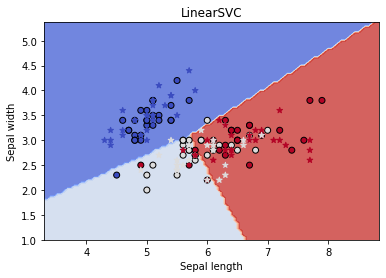

In [20]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


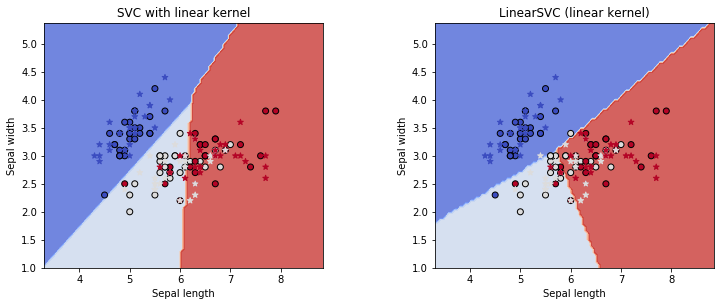

In [21]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

In [22]:
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9733333333333334